# Telco Customer Churn Rate

Pada perusahaan layanan telekomunikasi, pasti ada pelanggan yang berhenti menggunakan layanan tersebut karena beberapa faktor
maka diperlukan program-program promosi yang ditargetkan langsung terhadap pelanggan yang diprediksi akan berhenti. Machine
learning model ini dibuat untuk memprediksi pelanggan yang akan berhenti langganan.

## 1. EDA 

Pada Proses ini kita akan melakukan cleaning terhadap data yang akan kita gunakan. Untuk langkah pertama kita akan menghilangkan fitur yang tidak perlu dan membersihkan data dari data null. selanjutnya mengubah data string menjadi numerik. dan yang terakhir kita akan melakukan normalisasi data.

In [181]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline

data = pd.read_csv('D:/Digital Talent Scholarship/Artificial Intelligence-UGM/Project-AI/WA_Fn-UseC_-Telco-Customer-Churn.csv') # Load data yang akan kita gunakan
#df = pd.read_csv('D:/Digital Talent Scholarship/project/telco-churn-rate/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [182]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [183]:
data.isnull().sum() # Untuk Mengecek apakah ada missing data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [184]:
data.dtypes # Melihat tipe data tiap feature pada dataset 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Note: dapat kita lihat bahwa Total Charges yang seharusnya mempunyai tipe data float tetapi malah mempunyai tipe object.

### Total Charges

In [185]:
data['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.65       8
19.9        8
45.3        7
19.55       7
19.45       6
20.25       6
20.15       6
20.3        5
20.45       5
19.85       4
50.15       4
69.9        4
20.35       4
19.5        4
19.4        4
75.3        4
74.7        4
19.3        4
69.95       4
19.95       4
19.2        4
44.4        4
69.65       4
20.5        4
70.6        4
20.4        4
           ..
6779.05     1
604.7       1
1657.4      1
1245.6      1
2780.6      1
6033.3      1
70.7        1
7661.8      1
2751        1
8424.9      1
1939.35     1
7534.65     1
1193.55     1
1328.15     1
1888.65     1
6109.75     1
1051.05     1
7281.6      1
1148.1      1
5166.2      1
4297.6      1
1090.6      1
2312.55     1
370.4       1
709.5       1
137.85      1
5308.7      1
6880.85     1
2538.2      1
1607.2      1
Name: TotalCharges, Length: 6531, dtype: int64

In [186]:
def convert(x): # membuat fungsi untuk mengubah nilai object menjadi nilai float
    try:
        float(x)
    except:
        result=np.nan
    else:
        result=float(x)
    return result

In [187]:
data['TotalCharges']=data['TotalCharges'].map(convert)

In [188]:
data[data['TotalCharges'].isnull()].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes


In [189]:
data[data['tenure']==0].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes


Nilai NaN pada Total Charges berkaitan dengan nilai tenure 0. Dapat kita asumsikan bahwa pelanggan yang memiliki NaN values pada feature Total Charges adalah pelanggan baru. Untuk itu kita akan mengganti NaN values pada Total Charges menjadi 0.

In [190]:
data['TotalCharges'].replace(np.nan,0,inplace=True)
data['TotalCharges'].isnull().sum()

0

### Target Feature (Churn)

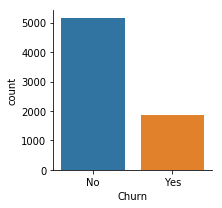

In [191]:
ax = sns.catplot(x="Churn", kind="count", data=data, height=3, aspect=1, orient='v')

In [115]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Terdapat 26% yang 'churn' terhadap layanan lainnya

In [116]:
print(data.shape)
print(data['Churn'].shape)

(7043, 21)
(7043,)


Tidak ada data yang hilang pada Target Feature

### Contract

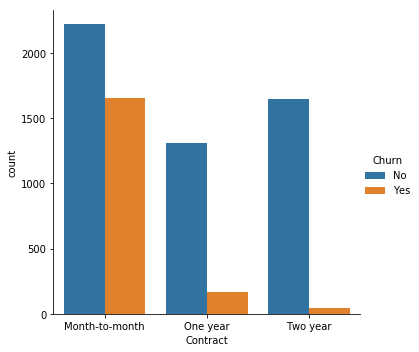

In [117]:
ax = sns.catplot(x='Contract',data=data,kind="count",hue='Churn')

Pelanggan yang mempunyai kontrak bulanan cenderung 'churn'

### Senior Citizen

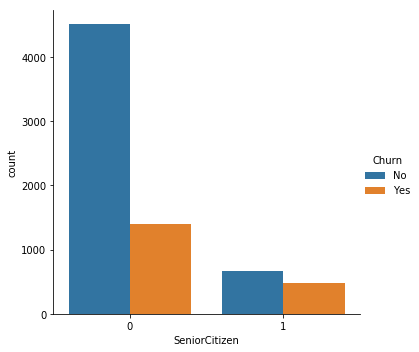

In [118]:
ax = sns.catplot(x='SeniorCitizen',data=data,kind="count",hue='Churn')

### Payment Method

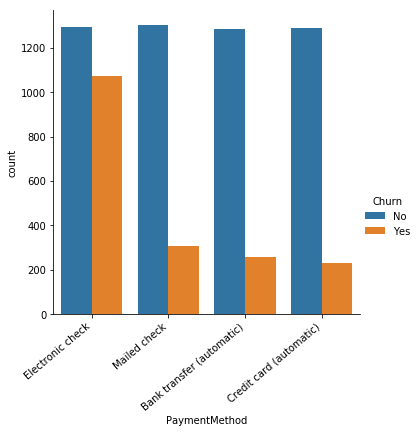

In [119]:
ax = sns.catplot(x="PaymentMethod", kind="count",hue='Churn', data=data, height=5, aspect=1, orient='v')
ax.set_xticklabels(rotation=40, ha="right")

Pelanggan yang menggunakan pembayaran dengan Electronic check cenderung 'churn'

### Gender 

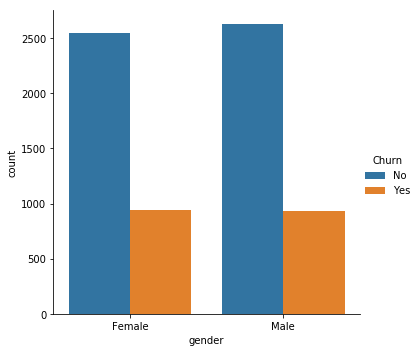

In [120]:
ax = sns.catplot(x='gender',data=data,kind="count",hue='Churn')

fitur gender pada dataset tidak berpengaruh pada target feature ('churn')

### Partner

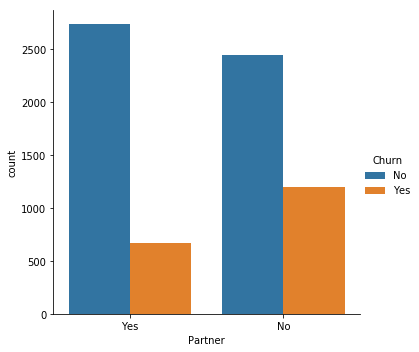

In [121]:
ax = sns.catplot(x='Partner',data=data,kind="count",hue='Churn')

### Dependents

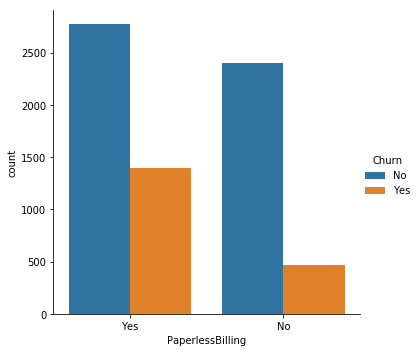

In [122]:
ax = sns.catplot(x='PaperlessBilling',data=data,kind="count",hue='Churn')

### Tenure

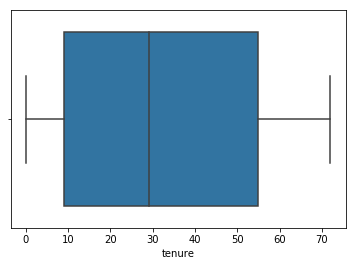

In [131]:
ax=sns.boxplot(data['tenure'])

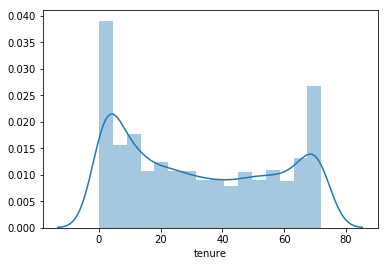

In [132]:
ax=sns.distplot(data['tenure'])

### Monthly Charges 

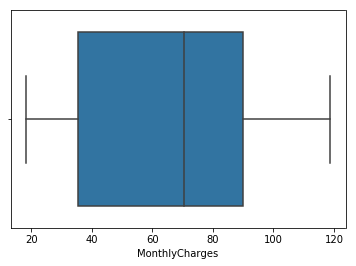

In [138]:
ax=sns.boxplot(data['MonthlyCharges'])

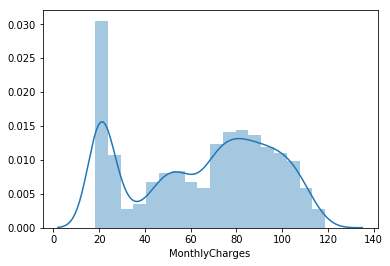

In [140]:
ax=sns.distplot(data['MonthlyCharges'])

### Total Charges

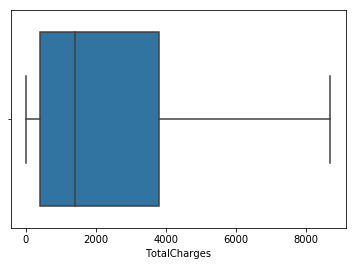

In [133]:
ax=sns.boxplot(data['TotalCharges'])

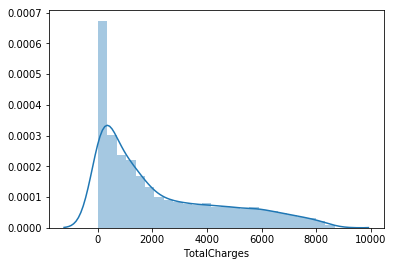

In [134]:
az=sns.distplot(data['TotalCharges'])

## 2. Data Cleaning


fitur customer ID dan gender akan dihilangkan karena tidak berpengaruh terhadap labelling data.

In [192]:
data.drop(['customerID','gender'], axis=1, inplace=True)

## 3. Data Preprocessing

### Mengubah data string menjadi numerik

In [193]:
data['Partner'] = data['Partner'].map(lambda s :1  if s =='Yes' else 0)
data['Churn'] = data['Churn'].map(lambda s :1  if s =='Yes' else 0)
data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 0)
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 0)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 0)
data['TechSupport'] = data['TechSupport'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if s =='Yes' else 0)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 0)
data['MultipleLines'].replace('No phone service','No', inplace=True)
data['MultipleLines'] = data['MultipleLines'].map(lambda s :1  if s =='Yes' else 0)
data['Has_InternetService'] = data['InternetService'].map(lambda s :0  if s =='No' else 1)
data['Fiber_optic'] = data['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
data['DSL'] = data['InternetService'].map(lambda s :1  if s =='DSL' else 0)

data = pd.get_dummies(data=data, columns=['PaymentMethod'])
data = pd.get_dummies(data=data, columns=['Contract'])
data.drop(['InternetService'], axis=1, inplace=True)


In [194]:
data.head().T

,0,1,2,3,4
SeniorCitizen,0.00,0.00,0.00,0.00,0.00
Partner,1.00,0.00,0.00,0.00,0.00
Dependents,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
PhoneService,0.00,1.00,1.00,0.00,1.00
MultipleLines,0.00,0.00,0.00,0.00,0.00
OnlineSecurity,0.00,1.00,1.00,1.00,0.00
OnlineBackup,1.00,0.00,1.00,0.00,0.00
DeviceProtection,0.00,1.00,0.00,1.00,0.00
TechSupport,0.00,0.00,0.00,1.00,0.00


### Normalisasi Data 

In [195]:
data=(data-data.min())/(data.max()-data.min())

In [196]:
#Pemisahan data training dan data test
from sklearn.model_selection import train_test_split
data["Churn"] = data["Churn"].astype(int)
y = data["Churn"]
X = data.drop(labels = ["Churn"],axis = 1)
n_samples=len(y)
"""
X_train=X[:(6*n_samples//7)]
X_test=X[(6*n_samples//7):]
y_train=y[:6*n_samples//7]
y_test=y[6*n_samples//7:]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, train_size=6/7, random_state=42)
"""

'\nX_train=X[:(6*n_samples//7)]\nX_test=X[(6*n_samples//7):]\ny_train=y[:6*n_samples//7]\ny_test=y[6*n_samples//7:]\n\n#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, train_size=6/7, random_state=42)\n'

In [197]:
X.shape

(7043, 25)

###  Split training data  dan test data

In [198]:
from sklearn.feature_selection import SelectKBest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, train_size=6/7, random_state=42)

## 4. Machine Learning Model

### SVM

Penentuan Parameter SVM menggunakan Cross Validation

In [199]:
%%time
from sklearn import svm
from sklearn.model_selection import GridSearchCV

C = [0.001, 0.01, 0.1, 1, 10]
gamma = [ 0.001,0.1, 1]
kernel=['linear','poly','rbf','sigmoid']

hyperparameters = dict(C=C, gamma=gamma, kernel=kernel)
clf = GridSearchCV(svm.SVC(), hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])

Best kernel: linear
Best C: 0.1
Best gamma: 0.001
Wall time: 1h 16min 43s


### Logistic Regression

Pemilihan nilai parameter sistem Logistic Regression dengan cross validation

In [164]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']

C = np.logspace(0, 4, 10)
solver=['newton-cg','lbfgs','liblinear','sag','saga']

logistic = LogisticRegression()

hyperparameters = dict(C=C, solver=solver)
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Solver: newton-cg
Best C: 21.544346900318832
Wall time: 2min 21s


## 5. Performa Sistem 

In [206]:
from sklearn import datasets,metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score

clf = svm.SVC(C=0.1,gamma=0.001,kernel='linear')
clf.fit(X_train,y_train)
predictions1= clf.predict(X_test)
score1=f1_score(y_test,predictions1,average='macro')
score1=round(score1,3)
#print("Classification report for classifier %s:\n%s\n"
#      % (clf, metrics.classification_report(y_test, predictions)))
#print("Confusion matrix:\n%s" %metrics.confusion_matrix(y_test,predictions))
#print("Accuracy: %0.4f" % metrics.accuracy_score(y_test,predictions))
print("SVM F1 Score = ",score1)
print("----------------------------")

clf2 = LogisticRegression(C=21,penalty='l2',random_state=0, solver='newton-cg',multi_class='ovr',max_iter=200)
clf2.fit(X_train,y_train)
predictions2 = clf2.predict(X_test)
score2=f1_score(y_test,predictions2,average='macro')
score2=round(score2,3)
print("Logistic Regression F1 Score  = ",score2)
#print("Classification report for classifier %s:\n%s\n"
#   % (clf2, metrics.classification_report(y_test, predictions)))
#print("Confusion matrix:\n%s" %metrics.confusion_matrix(y_test,predictions))
#print("Accuracy: %0.4f" % metrics.accuracy_score(y_test,predictions))


SVM F1 Score =  0.765
----------------------------
Logistic Regression F1 Score  =  0.764


## Menggunakan Feature Selection 

### Pemilihan nilai K pada Feature Selection  K-best features menggunakan SVM

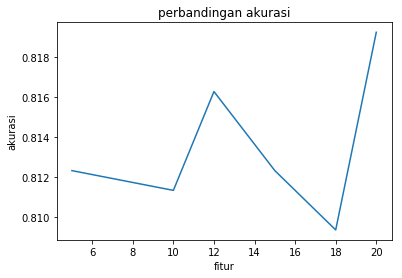

In [209]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

def svm_predict(a):
    X = data.drop(labels = ["Churn"],axis = 1)
    X = SelectKBest(chi2, k=a).fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, train_size=6/7, random_state=42)
    clf = svm.SVC(C=0.1,gamma=0.001,kernel='linear')
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    return accuracy
K=[5,10,12,15,18,20]
list_accuracy=[]
for i in K:
    list_accuracy.append(svm_predict(i))
x_label=K
y_label=list_accuracy
plt.plot(x_label,y_label)
plt.title('perbandingan akurasi')
plt.xlabel('fitur')
plt.ylabel('akurasi')
plt.show()

### Pemilihan Nilai K-best Features dengan Logistic Regression

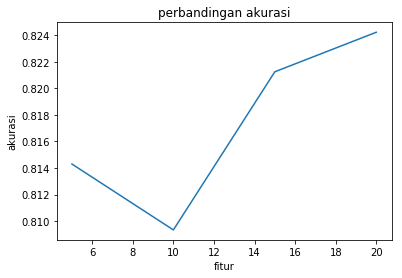

In [210]:
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

def svm_predict(a):
    X = data.drop(labels = ["Churn"],axis = 1)
    X = SelectKBest(chi2, k=a).fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, train_size=6/7, random_state=42)
    clf = LogisticRegression(random_state=0,C=21, solver='newton-cg',multi_class='ovr',max_iter=200)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    return accuracy
K=[5,10,15,20]
list_accuracy=[]
for i in K:
    list_accuracy.append(svm_predict(i))
x_label=K
y_label=list_accuracy
plt.plot(x_label,y_label)
plt.title('perbandingan akurasi')
plt.xlabel('fitur')
plt.ylabel('akurasi')
plt.show()

In [211]:
selector = SelectKBest(chi2, k = 20)# jumlah feature yang dipilih
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feature_names', 'chi_scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['chi_scores', 'Feature_names'], ascending = [False, True])
print(ns_df_sorted)

                              Feature_names  chi_scores
17                  Contract_Month-to-month  519.895311
19                        Contract_Two year  488.578090
15           PaymentMethod_Electronic check  426.422767
11                              Fiber_optic  374.476216
3                                    tenure  226.096162
18                        Contract_One year  176.123171
4                            OnlineSecurity  147.295858
6                               TechSupport  135.559783
0                             SeniorCitizen  134.351545
2                                Dependents  133.036443
7                          PaperlessBilling  105.680863
14    PaymentMethod_Credit card (automatic)   99.582057
1                                   Partner   82.412083
10                      Has_InternetService   79.251371
13  PaymentMethod_Bank transfer (automatic)   76.485913
9                              TotalCharges   71.883291
12                                      DSL   71

In [212]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=15).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=1/7, train_size=6/7, random_state=42)

## Performa Sistem 

Performa Sistem diukur menggunakan confusion matrix

In [215]:
from sklearn import datasets,metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score

clf = svm.SVC(C=1,gamma=1,kernel='rbf')
clf.fit(X_train,y_train)
predictions1= clf.predict(X_test)
score3=f1_score(y_test,predictions1,average='macro')
score3=round(score3,3)
print("SVM F1 Score = ",score3)
print("----------------------------")

clf2 = LogisticRegression(C=166.8,penalty='l2',random_state=0, solver='newton-cg',multi_class='ovr',max_iter=200)
clf2.fit(X_train,y_train)
predictions2 = clf2.predict(X_test)
score4=f1_score(y_test,predictions2,average='macro')
score4=round(score4,2)
print("Logistic Regression F1 Score  = ",score3)

SVM F1 Score =  0.746
----------------------------
Logistic Regression F1 Score  =  0.746


### Kesimpulan

[0.765, 0.764, 0.746, 0.76]
Note: FS=Feature Selection


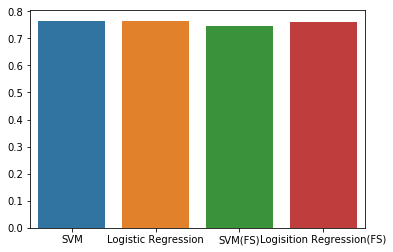

In [216]:
# Tanpa Feature Selection
y=[score1,score2,score3,score4]
x=['SVM','Logistic Regression','SVM(FS)','Logisition Regression(FS)']
ax=sns.barplot(x=x,y=y)
print(y)
print('Note: FS=Feature Selection')

Tingkat akurasi pada model SVM dan Logistic Regression tidak berbeda jauh. Dan penggunaan feature selection dengan metode
Chi2 tidak efektif meningkatkan keakuratan model.

### Menampilkan hasil prediksi sistem

In [217]:
# clf2= Logistic Regression 
hasil_prediksi=clf2.predict(X_test[:10])
hasil_sebenarnya=y_test[:10]

print("prediksi dari sistem ", hasil_prediksi)
print(hasil_sebenarnya)


prediksi dari sistem  [1 0 0 1 0 0 0 0 0 0]
185     1
2715    0
3825    0
1807    1
132     0
1263    1
3732    0
1672    0
811     1
2526    1
Name: Churn, dtype: int32
